# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Matthew Clark
- **Email:** matthewclark965@gmail.com
- **ID Dicoding:** M891D5Y1083

## Menentukan Pertanyaan Bisnis

- **Pertanyaan 1:** Produk kategori apa yang paling banyak terjual dan kategori apa yang menghasilkan pendapatan terbesar?
- **Pertanyaan 2:** Bagaimana segmentasi pelanggan kita berdasarkan perilaku pembelian (Recency, Frequency, Monetary)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

## Data Wrangling

### Gathering Data
Pada tahap ini, kita akan mengumpulkan data yang dibutuhkan. Dataset yang digunakan adalah **E-Commerce Public Dataset** yang dimana hanya akan memuat tabel yang relevan untuk menjawab pertanyaan bisnis

1.  `customers_dataset.csv`: Informasi pelanggan.
2.  `orders_dataset.csv`: Informasi utama pesanan.
3.  `order_items_dataset.csv`: Detail item dalam pesanan.
4.  `products_dataset.csv`: Informasi produk.
5.  `product_category_name_translation.csv`: Translasi nama kategori.

In [2]:
# Ekstrak File ZIP
local_zip = 'E-commerce-public-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/data')
zip_ref.close()

# Cek isi folder
print("File berhasil diekstrak:", os.listdir('/content/data'))

# Load Dataset
base_path = '/content/data'

# Cek kembali apakah masih ada zip di dalamnya
if 'E-Commerce Public Dataset' in os.listdir(base_path):
    base_path = '/content/data/E-Commerce Public Dataset'

# Ambil tabel yang relevan untuk menjawab pertanyaan bisnis
customers_df = pd.read_csv(os.path.join(base_path, "customers_dataset.csv"))
orders_df = pd.read_csv(os.path.join(base_path, "orders_dataset.csv"))
order_items_df = pd.read_csv(os.path.join(base_path, "order_items_dataset.csv"))
products_df = pd.read_csv(os.path.join(base_path, "products_dataset.csv"))
product_category_df = pd.read_csv(os.path.join(base_path, "product_category_name_translation.csv"))

# Sampel Data
print("\nData Orders 5 baris pertama:")
display(orders_df.head())

print("\nData Customers 5 baris pertama:")
display(customers_df.head())

File berhasil diekstrak: ['E-Commerce Public Dataset']

Data Orders 5 baris pertama:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00



Data Customers 5 baris pertama:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Insight:**
- Saya hanya memakai 5 tabel diatas yang dimana tabel tersebut merupakan relevan untuk menjawab setiap pertanyaan bisnis

### Assessing Data
- Pada tahap ini kita gunakan untuk memeriksa tipe data apakah sudah benar atau belum, memeriksa apakah ada data kosong, dan yang terakhir memeriksa apakah ada data ganda atau tidak.

In [3]:
print("\nMemeriksa data")

# Cek dataset product
print("\nDataset Products")
print("\nMissing Values:", products_df.isna().sum())
print("Duplikasi:", products_df.duplicated().sum())

# Cek dataset customer
print("\nDataset Customer")
print("\nMissing Values:", customers_df.isna().sum())
print("Duplikasi:", customers_df.duplicated().sum())

# Cek dataset order items
print("\nDataset Order Items")
print("\nMissing Values:", order_items_df.isna().sum())
print("Duplikasi:", order_items_df.duplicated().sum())
order_items_df.info()

# Cek Dataset orders
print("\nDataset Orders")
print("\nMissing Values:", orders_df.isna().sum())
print("Duplikasi:", orders_df.duplicated().sum())
orders_df.info()


Memeriksa data

Dataset Products

Missing Values: product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64
Duplikasi: 0

Dataset Customer

Missing Values: customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
Duplikasi: 0

Dataset Order Items

Missing Values: order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Duplikasi: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  -

**Insight:**
1.  **Missing Value (Data Kosong):**
    * **`products_df`**: Terdapat **610 data kosong** pada kolom `product_category_name`.
    * **`orders_df`**: Terdapat data kosong pada kolom `order_delivered_customer_date`.
    * **`customers_df` & `order_items_df`**: Kedua dataset ini bersih dari *missing value*.

2.  **Tipe Data (Data Type):**
    * **`orders_df`**: Kolom tanggal `order_purchase_timestamp` dan lain-lain masih bertipe **`object`** (teks). wajib diubah ke tipe **`datetime`** agar bisa dilakukan analisis berdasarkan waktu.
    * **`order_items_df`**: Kolom `shipping_limit_date` juga masih bertipe **`object`**, perlu diubah ke **`datetime`**.

3.  **Duplikasi:**
    * Seluruh dataset (`orders`, `items`, `products`, `customers`) bebas dari duplikasi

### Cleaning Data
- Pada tahap ini kita membersihkan data dengan mengisi data kosong menjadi 'unknown' dan untuk tipe data yang salah juga kita benarkan menjadi datetime

In [4]:
# Membersihkan dataset product
# Ganti data kosong dengan label "Unknown"
products_df['product_category_name'] = products_df['product_category_name'].fillna("Unknown")

# Mengubah tipe data menjadi tanggal pada dataset order items
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

# Mengubah tipe data menjadi tanggal pada dataset orders
datetime_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

# CEK HASIL CLEANING
print("Jumlah missing value di products setelah cleaning:", products_df['product_category_name'].isna().sum())
print("Tipe data shipping_limit_date:", order_items_df['shipping_limit_date'].dtype)
print("Tipe data order_purchase_timestamp:", orders_df['order_purchase_timestamp'].dtype)

Jumlah missing value di products setelah cleaning: 0
Tipe data shipping_limit_date: datetime64[ns]
Tipe data order_purchase_timestamp: datetime64[ns]


**Insight:**
- Dataset sudah bersih dari missing values
- Tipe data yang salah juga sudah dibenarkan

## Exploratory Data Analysis (EDA)

### Explore pertanyaan 1 : Produk kategori apa yang paling banyak terjual dan yang menghasilkan pendapatan terbesar?

In [5]:
# Menggabungkan dataset Order Items + Products + Translation
# Menggabungkan items dengan info produk
items_product_df = pd.merge(
    left=order_items_df,
    right=products_df,
    how="left",
    on="product_id"
)

# Menggabungkan dengan terjemahan kategori menjadi bahasa inggris
all_data_df = pd.merge(
    left=items_product_df,
    right=product_category_df,
    how="left",
    on="product_category_name"
)

# Melakukan Agregasi (Hitung Jumlah & Pendapatan sekaligus)
category_performance = all_data_df.groupby("product_category_name_english").agg({
    "product_id": "count",   # Menghitung jumlah order (Quantity)
    "price": "sum"           # Menjumlahkan harga (Revenue)
})

# Mengganti nama kolom agar lebih mudah dibaca
category_performance.rename(columns={
    "product_id": "quantity_sold",
    "price": "total_revenue"
}, inplace=True)

# Menampilkan Hasil
print("Top 5 Berdasarkan Kategori Terlaris")
print(category_performance.sort_values(by="quantity_sold", ascending=False).head(5))

print("\nTop 5 Berdasarkan Pendapatan Terbesar")
print(category_performance.sort_values(by="total_revenue", ascending=False).head(5))

Top 5 Berdasarkan Kategori Terlaris
                               quantity_sold  total_revenue
product_category_name_english                              
bed_bath_table                         11115     1036988.68
health_beauty                           9670     1258681.34
sports_leisure                          8641      988048.97
furniture_decor                         8334      729762.49
computers_accessories                   7827      911954.32

Top 5 Berdasarkan Pendapatan Terbesar
                               quantity_sold  total_revenue
product_category_name_english                              
health_beauty                           9670     1258681.34
watches_gifts                           5991     1205005.68
bed_bath_table                         11115     1036988.68
sports_leisure                          8641      988048.97
computers_accessories                   7827      911954.32


**Insight:**
- Berdasarkan data diatas kategori barang yang terlaris adalah `bed_bath_table`
- Berdasarkan data diatas kategori yang mendapatkan revenue atau pendapatan terbesar adalah `health_beauty`

### Explore pertanyaan 2 : Bagaimana segmentasi pelanggan kita berdasarkan perilaku pembelian (Recency, Frequency, Monetary)?

In [6]:
# Menggabungkan dataset Orders + Customers + Order Items
# Kita ambil customer_unique_id dari dataset customer, tanggal dari orders, dan harga dari items
rfm_mains_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    on="customer_id"
)

rfm_df = pd.merge(
    left=rfm_mains_df,
    right=order_items_df,
    how="left",
    on="order_id"
)

# Menentukan Tanggal untuk analisis menggunakan tanggal terakhir + 1
recent_date = orders_df["order_purchase_timestamp"].max() + pd.DateOffset(days=1)

# Menghitung RFM
rfm_report = rfm_df.groupby("customer_unique_id").agg({
    "order_purchase_timestamp": lambda x: (recent_date - x.max()).days, # Recency (Jarak hari)
    "order_id": "nunique", # Frequency (Jumlah order unik)
    "price": "sum"         # Monetary (Total uang)
})

# Merapikan nama kolom
rfm_report.rename(columns={
    "order_purchase_timestamp": "recency",
    "order_id": "frequency",
    "price": "monetary"
}, inplace=True)

print("Sample Hasil RFM Analysis")
print(rfm_report.head())

Sample Hasil RFM Analysis
                                  recency  frequency  monetary
customer_unique_id                                            
0000366f3b9a7992bf8c76cfdf3221e2      161          1    129.90
0000b849f77a49e4a4ce2b2a4ca5be3f      164          1     18.90
0000f46a3911fa3c0805444483337064      586          1     69.00
0000f6ccb0745a6a4b88665a16c9f078      370          1     25.99
0004aac84e0df4da2b147fca70cf8255      337          1    180.00


**Insight:**
1.  **Recency:**
    * Terdapat sejumlah pelanggan yang baru saja bertransaksi dalam beberapa hari terakhir yang ditandakan dengan nilai recency yang kecil

2.  **Frequency:**
    * Mayoritas pelanggan memiliki frekuensi pembelian yang rendah

3.  **Monetary:**
    * Terdapat beberapa pelanggan yang spent uang diatas rata" pelanggan lainnya

## Visualization & Explanatory Analysis

### Pertanyaan 1:

/tmp/ipython-input-2662411587.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quantity_sold", y="product_category_name_english", data=top_qty, palette=colors, ax=ax[0])
/tmp/ipython-input-2662411587.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_revenue", y="product_category_name_english", data=top_revenue, palette=colors, ax=ax[1])


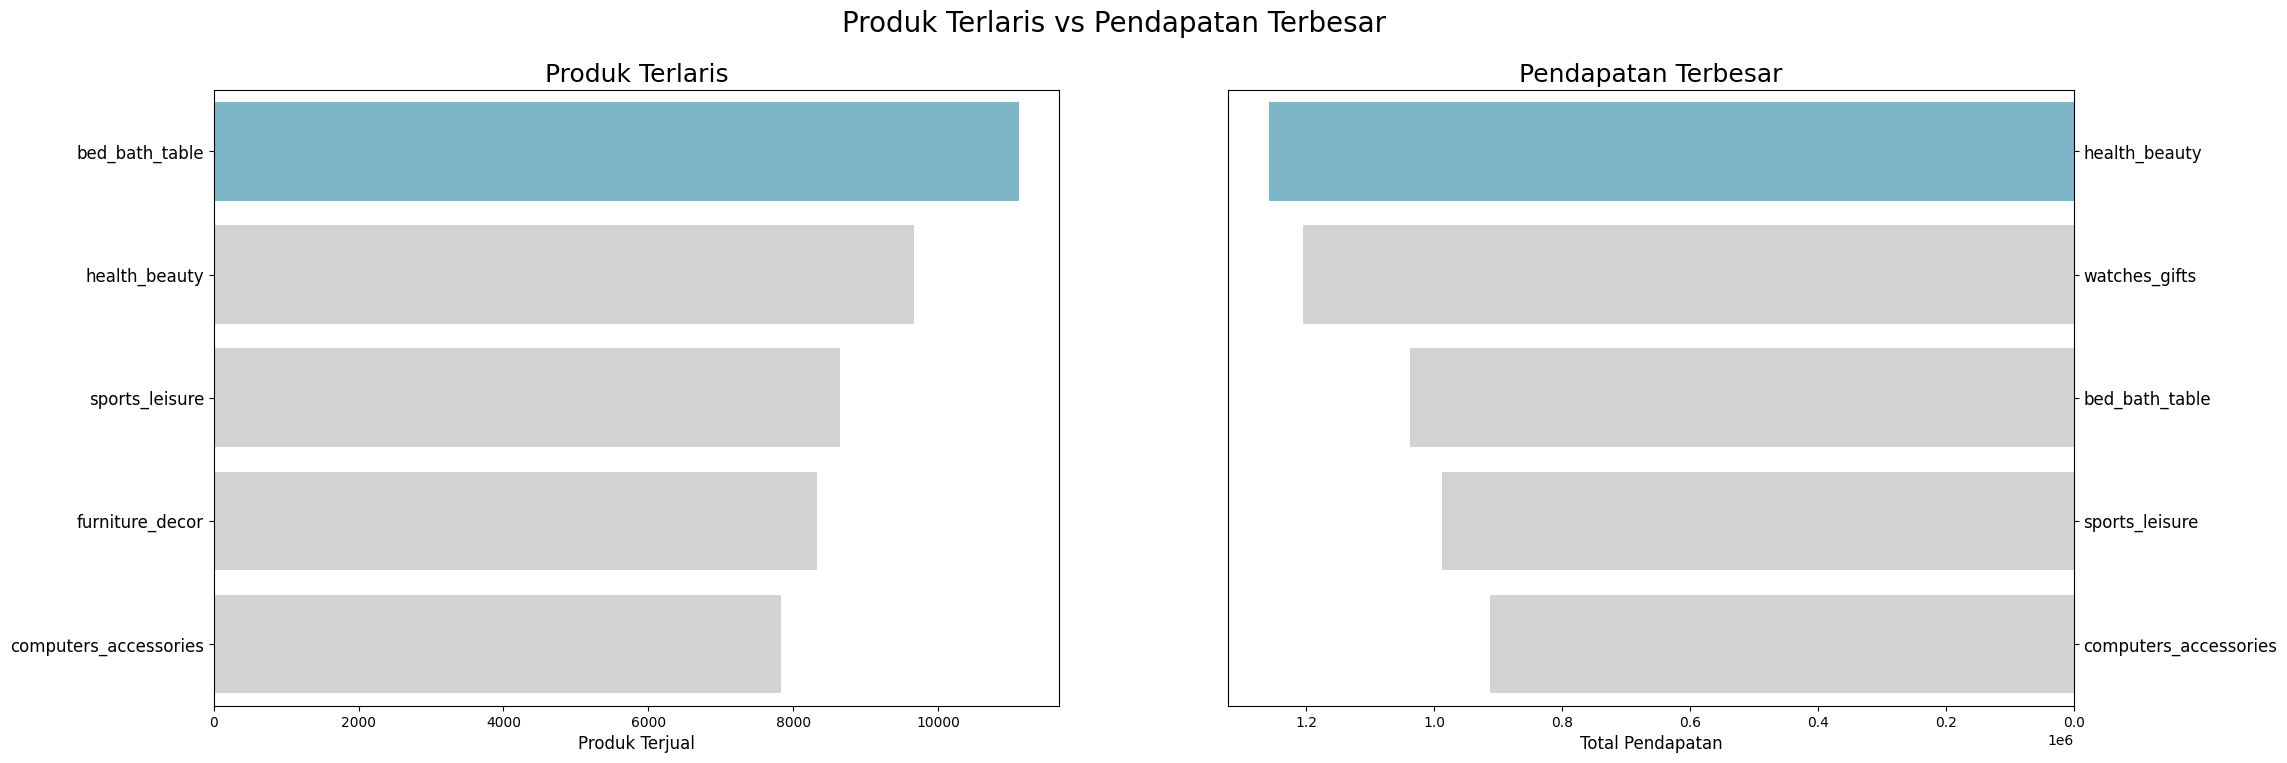

In [7]:
# Menyiapkan data untuk visualisasi (Reset index agar nama kategori jadi kolom)
top_qty = category_performance.sort_values(by="quantity_sold", ascending=False).head(5).reset_index()
top_revenue = category_performance.sort_values(by="total_revenue", ascending=False).head(5).reset_index()

# Membuat 2 grafik secara berdampingan
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

# Membuat warna
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Grafik Produk Terlaris
sns.barplot(x="quantity_sold", y="product_category_name_english", data=top_qty, palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("Produk Terjual", fontsize=12)
ax[0].set_title("Produk Terlaris", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=12)

# Grafik Pendapatan Terbesar
sns.barplot(x="total_revenue", y="product_category_name_english", data=top_revenue, palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("Total Pendapatan", fontsize=12)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Pendapatan Terbesar", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Produk Terlaris vs Pendapatan Terbesar", fontsize=20)
plt.show()

**Insight:**
Berdasarkan visualisasi di atas, kita dapat menyimpulkan performa penjualan produk sebagai berikut:

1.  **Produk Terlaris**
  Kategori **`bed_bath_table`** merupakan produk yang paling banyak terjual, diikuti oleh `health_beauty` dan `sports_leisure`. Hal ini menunjukkan bahwa permintaan pasar terhadap kebutuhan rumah tangga sehari-hari sangat tinggi.
2.  **Produk dengan Pendapatan Tertinggi**
  Meskipun `bed_bath_table` paling banyak terjual, kategori **`health_beauty`** justru merupakan pendapatan terbesar bagi perusahaan. Selain itu, kategori **`watches_gifts`** muncul di peringkat ke-2 pendapatan terbesar meskipun tidak masuk dalam 3 besar kuantitas penjualan.

## Analisis Lanjutan (Opsional)

### Pertanyaan 2:

/tmp/ipython-input-2168355162.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_unique_id", data=rfm_report.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
/tmp/ipython-input-2168355162.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')
/tmp/ipython-input-2168355162.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_unique_id", data=rfm_report.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
/tmp/ipython-input-216835516

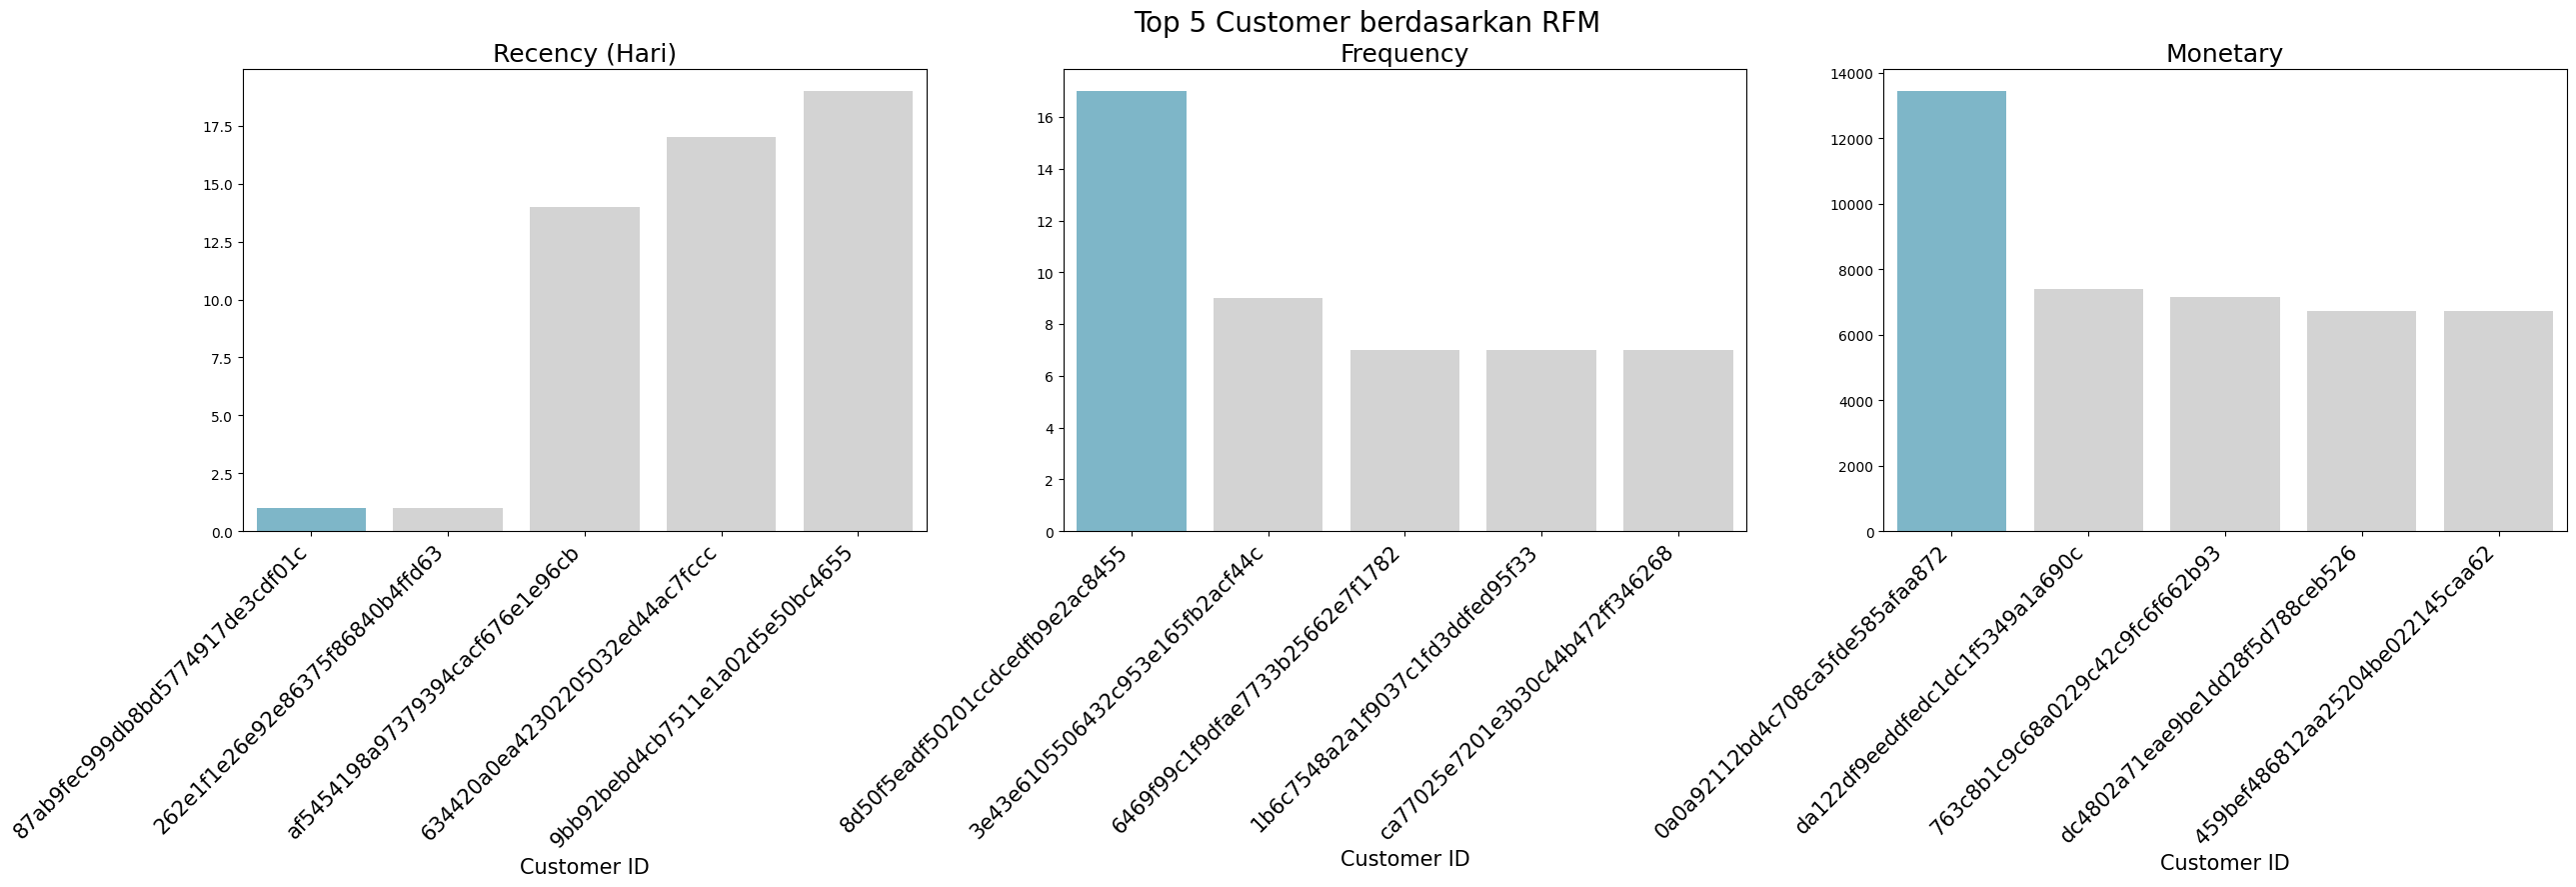

In [8]:
# Reset index agar bisa menjadi kolom
rfm_report.reset_index(inplace=True)

# Membuat 3 grafik berdampingan
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

# Memberi warna pada barchart
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Grafik Recency (Hari Terakhir Transaksi)
# Kita gunakan 5 pelanggan dengan angka Recency terkecil (Makin kecil = Makin baru belanja)
sns.barplot(y="recency", x="customer_unique_id", data=rfm_report.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("Customer ID", fontsize=15)
ax[0].set_title("Recency (Hari)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')

# Grafik Frequency (Sering Belanja)
# Kita gunakan 5 pelanggan dengan angka Frequency terbesar (Makin besar = Makin sering)
sns.barplot(y="frequency", x="customer_unique_id", data=rfm_report.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("Customer ID", fontsize=15)
ax[1].set_title("Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')

# Grafik Monetary (Banyak Keluar Uang)
# Kita gunakan 5 pelanggan dengan angka Monetary Terbesar (Makin besar = Makin banyak pengeluaran)
sns.barplot(y="monetary", x="customer_unique_id", data=rfm_report.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel("Customer ID", fontsize=15)
ax[2].set_title("Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45, ha='right')

# Judul Besar
plt.suptitle("Top 5 Customer berdasarkan RFM", fontsize=20)
plt.show()

**Insight:**
- **Recency:** Sejumlah pelanggan aktif dengan transaksi terakhir hanya beberapa hari yang lalu.
- **Frequency:** Terdapat beberapa pelanggan dengan frequensi pembelian terbanyak ini menandakan pelanggan tersebut melakukan repeat order
- **Monetary:** Terdapat beberapa pelanggan dengan pengeluaran nilai transaksi sangat besar.

## Conclusion

1. Conclution pertanyaan 1 : Produk kategori apa yang paling banyak terjual dan yang menghasilkan pendapatan terbesar?
*  Terdapat perbedaan signifikan antara popularitas (Kuantitas) dan nilai keuntungan (Pendapatan).
    * Secara **Kuantitas**, kategori **`bed_bath_table`** merupakan kategori produk paling laris. Kategori ini adalah produk yang mendatangkan banyak transaksi.
    * Secara **Pendapatan**, kategori **`health_beauty`** dan **`watches_gifts`** adalah penyumbang pendapatan terbesar. Khusus untuk `watches_gifts`, meskipun penjualannya tidak terlalu banyak, nilai transaksinya yang besar menjadikannya sangat krusial bagi pendapatan perusahaan.

2. Conclution pertanyaan 2 : Bagaimana segmentasi pelanggan berdasarkan perilaku pembelian (RFM)?
* Analisis RFM berhasil mengidentifikasi kelompok pelanggan terbaik yang memiliki skor tinggi pada masing" parameter (Recency, Frequency, dan Monetary).
    * Telah terlihat siapa saja pelanggan yang aktif (**High Recency**).
    * Telah terlihat pelanggan setia yang berbelanja berulang kali (**High Frequency**).
    * Telah terlihat pelanggan yang menyumbang pendapatan besar (**High Monetary**).

In [12]:
# Menggabungkan semua dataset
all_df = pd.merge(
    left=orders_df,
    right=order_items_df,
    how="left",
    on="order_id"
)

# Gabung Products
all_df = pd.merge(
    left=all_df,
    right=products_df,
    how="left",
    on="product_id"
)

# Gabung Customers
all_df = pd.merge(
    left=all_df,
    right=customers_df,
    how="left",
    on="customer_id"
)

# Gabung  Translation
all_df = pd.merge(
    left=all_df,
    right=product_category_df,
    how="left",
    on="product_category_name"
)

# Simpan ke CSV Final
all_df.to_csv("main_data.csv", index=False)

print("Berhasil")

Berhasil
